# Implementation 
- Here we will implement the logistic regression method on the Wisconsin Breast Cancer data. Our model will try to learn to predict the severity of breast cancer based on its various attributes. 

- One issue is that the dataset comes with many different attributes, not all are useful to training the model, and some might actually hurt the power of the model. therefore we will have to perform some prescreening and filter out for the attributes we actually want to use. Some attributes are also directly correlated with other attributes, so we'll have to avoid using them togethter to avoid multicolinearity.

# 1 - Import libraries and data

- The data is accessible through SKlearn dataset as its a commonly used set. The raw file is also saved in the data folder as a backup

- We'll also convert the catagorical variable for Diagnosis to a numerical one by mapping Malignant to 0, and Benign to 1.

- Here we weill do some brief screening to ensure the integrity of the dataset 

In [1]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from logistic_regression_method import SingleNeuron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report    

# --- Load and Prepare Data ---
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Diagnosis'] = pd.Series(data.target).map({0: 'Malignant', 1: 'Benign'})

print(df.head())
print(df['Diagnosis'].value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

** Remarks **

- Those are a lot of different attributes, we will want to cut down the number used by identifying the most relavent to diagnosis.

- To this end, we'll analyze each of the attributes against Diagnosis to check empirically and visually for the most valuable attributes to use.

# 2 - Initial screening for variables

- Here we will calculate and plot each of the independent variable against diagnosis to see which were most impactful to diagnosis



In [2]:
# --- Output Mean and SE by Diagnosis ---
print("=== Mean and Standard Error by Diagnosis ===\n")
mean_se = df.groupby('Diagnosis').agg(['mean', 'sem']).T
display(mean_se)

=== Mean and Standard Error by Diagnosis ===



Diagnosis                         Benign    Malignant
mean radius             mean   12.146524    17.462830
                        sem     0.094235     0.220050
mean texture            mean   17.914762    21.604906
                        sem     0.211444     0.259575
mean perimeter          mean   78.075406   115.365377
                        sem     0.624916     1.500984
mean area               mean  462.790196   978.376415
                        sem     7.107228    25.270084
mean smoothness         mean    0.092478     0.102898
                        sem     0.000712     0.000866
mean compactness        mean    0.080085     0.145188
                        sem     0.001786     0.003708
mean concavity          mean    0.046058     0.160775
                        sem     0.002299     0.005152
mean concave points     mean    0.025717     0.087990
                        sem     0.000842     0.002361
mean symmetry           mean    0.174186     0.192909
                        sem     0.001313     0.001898
mean fractal dimension  mean    0.062867     0.062680
                        sem     0.000357     0.000520
radius error            mean    0.284082     0.609083
                        sem     0.005958     0.023697
texture error           mean    1.220380     1.210915
                        sem     0.031183     0.033185
perimeter error         mean    2.000321     4.323929
                        sem     0.040815     0.176408
area error              mean   21.135148    72.672406
                        sem     0.468046     4.213897
smoothness error        mean    0.007196     0.006780
                        sem     0.000162     0.000199
compactness error       mean    0.021438     0.032281
                        sem     0.000865     0.001263
concavity error         mean    0.025997     0.041824
                        sem     0.001742     0.001484
concave points error    mean    0.009858     0.015060
                        sem     0.000302     0.000379
symmetry error          mean    0.020584     0.020472
                        sem     0.000370     0.000691
fractal dimension error mean    0.003636     0.004062
                        sem     0.000156     0.000140
worst radius            mean   13.379801    21.134811
                        sem     0.104865     0.294197
worst texture           mean   23.515070    29.318208
                        sem     0.290771     0.373264
worst perimeter         mean   87.005938   141.370330
                        sem     0.715930     2.023119
worst area              mean  558.899440  1422.286321
                        sem     8.658706    41.068593
worst smoothness        mean    0.124959     0.144845
                        sem     0.001059     0.001502
worst compactness       mean    0.182673     0.374824
                        sem     0.004879     0.011701
worst concavity         mean    0.166238     0.450606
                        sem     0.007429     0.012466
worst concave points    mean    0.074444     0.182237
                        sem     0.001895     0.003180
worst symmetry          mean    0.270246     0.323468
                        sem     0.002209     0.005129
worst fractal dimension mean    0.079442     0.091530
                        sem     0.000731     0.001480

** Remarks **

- too many numbers, hard to distinguish. We will plot them next for a more straight forward visual check

# 2.1 - visualization of unfiltered attributes
- we will plot each feature against the dependent variable to identify which were the most distinct for the different diagnosis.

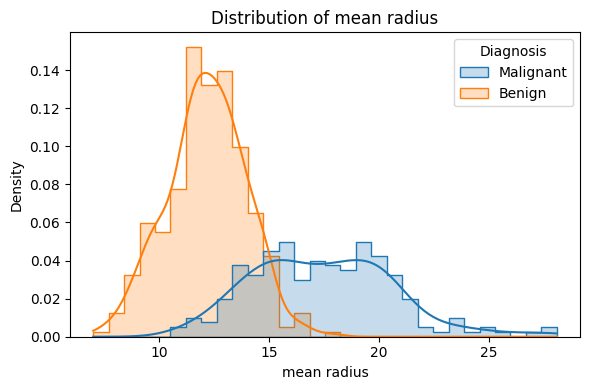

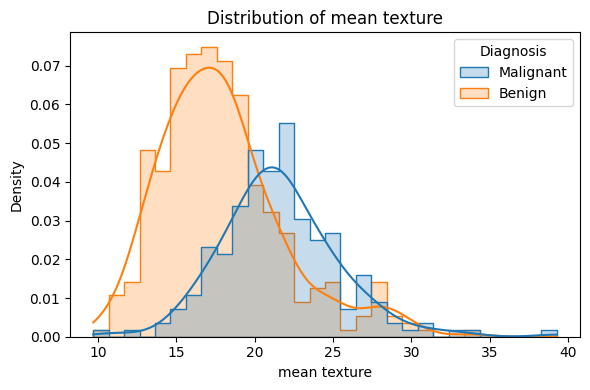

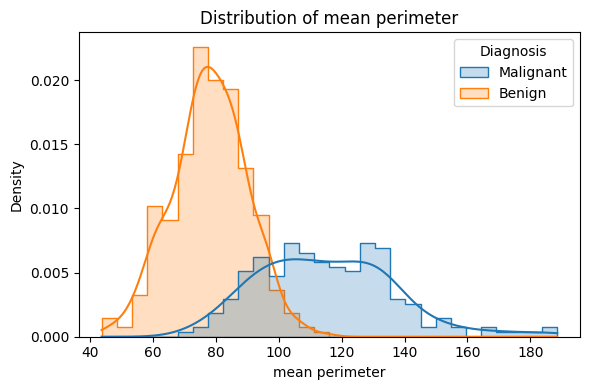

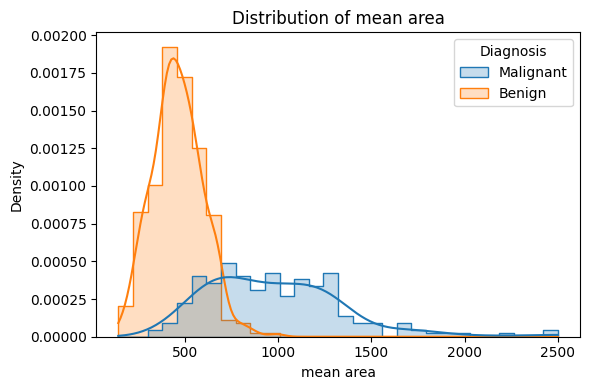

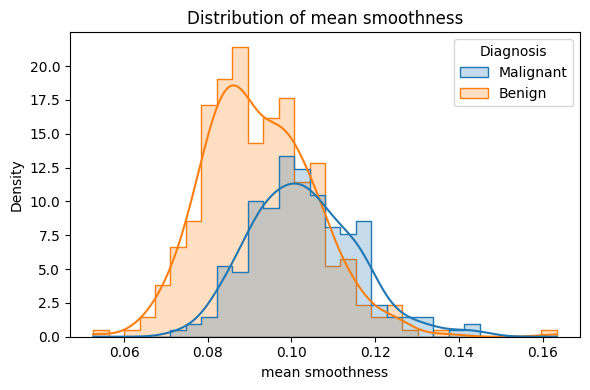

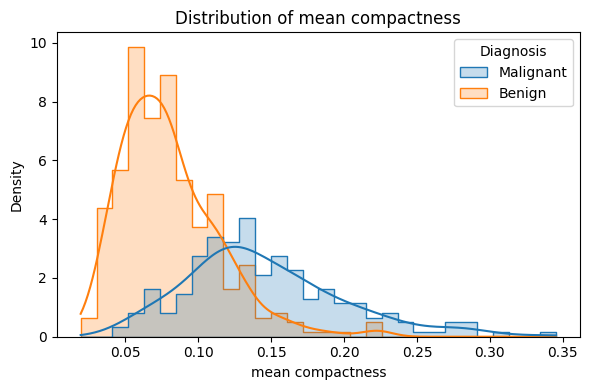

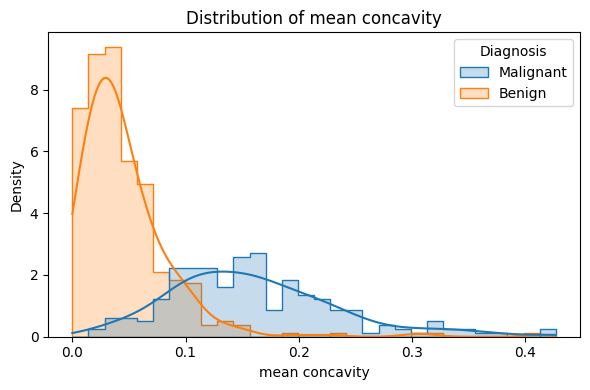

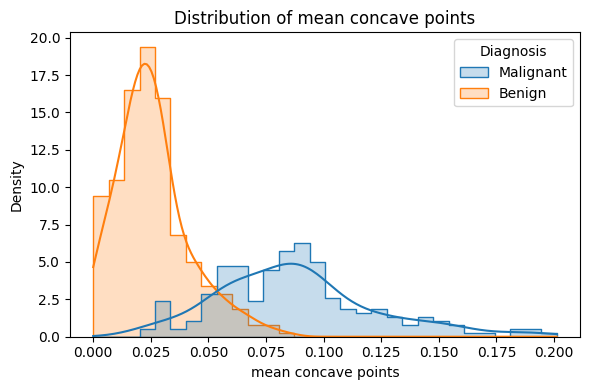

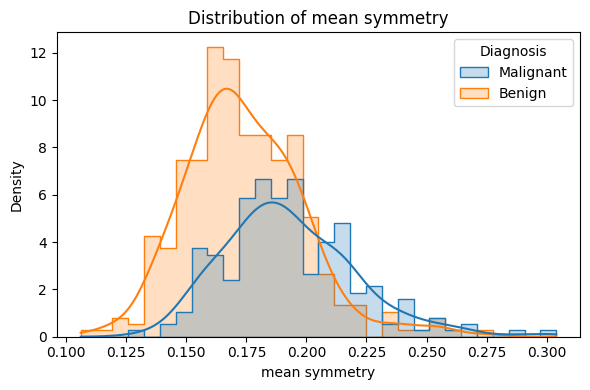

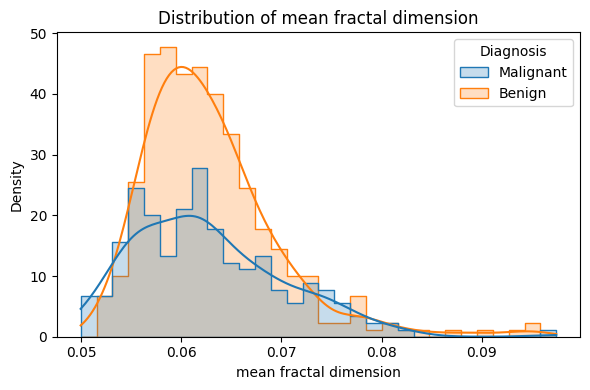

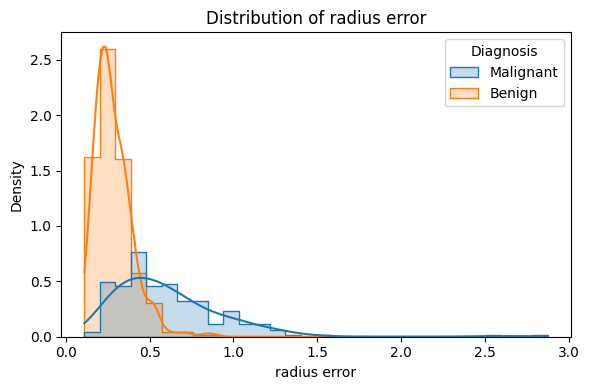

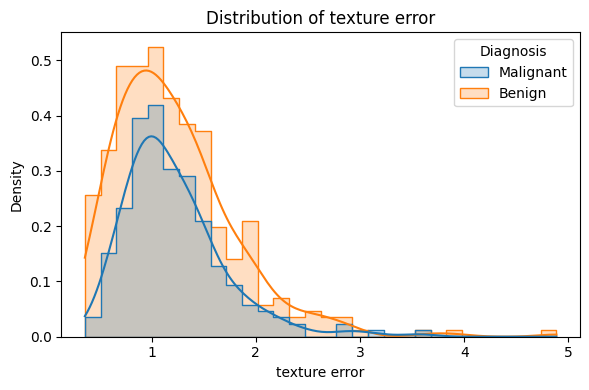

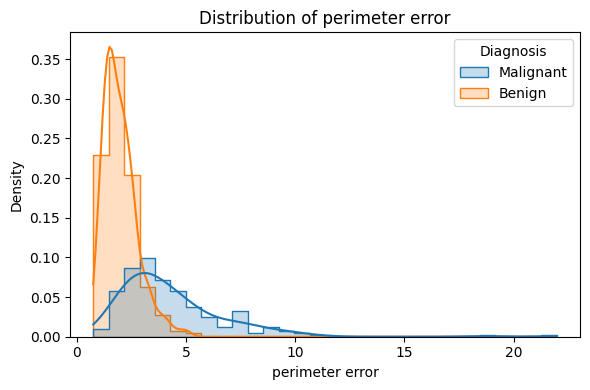

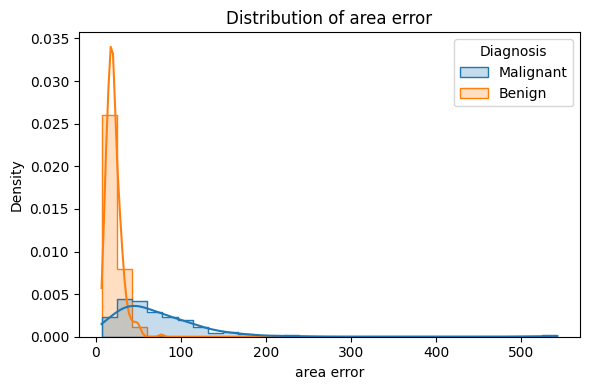

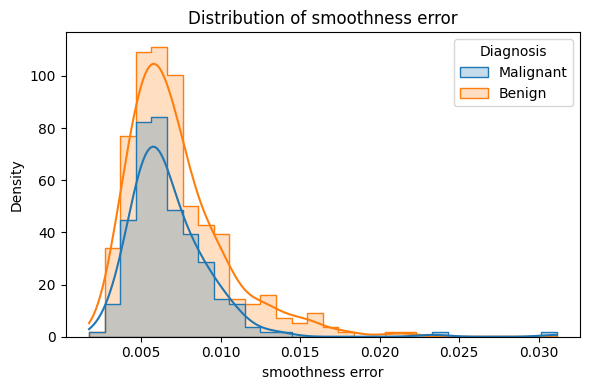

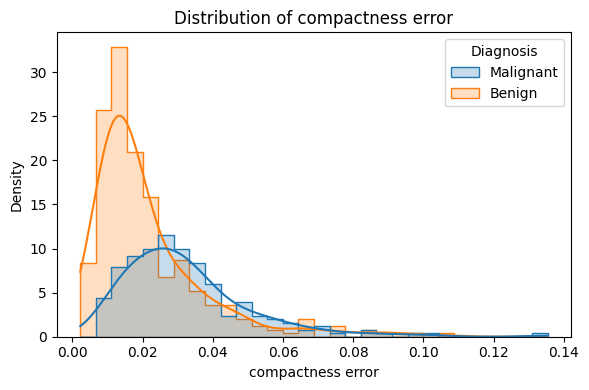

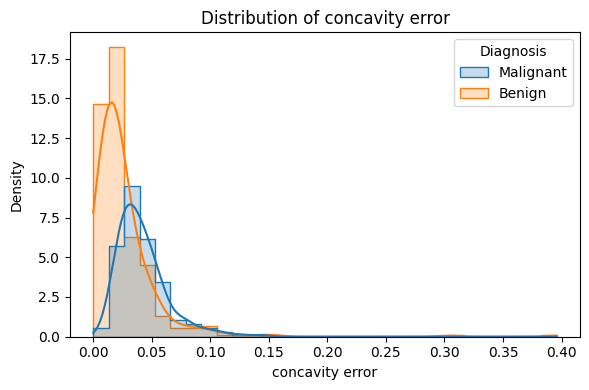

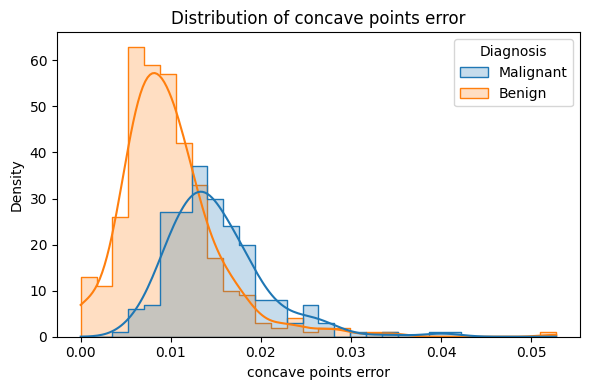

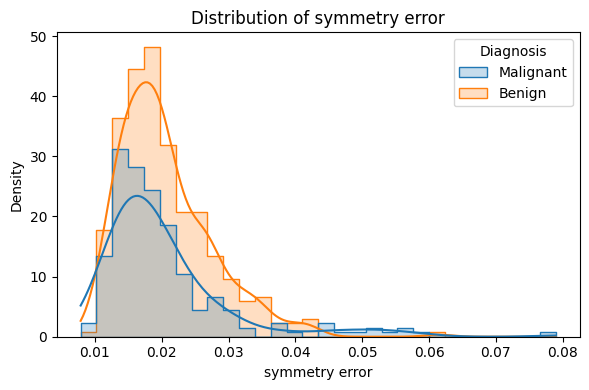

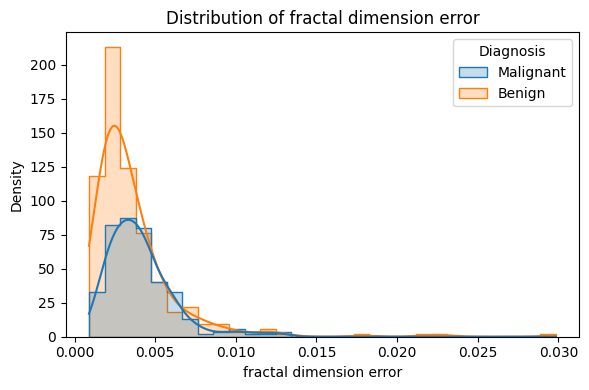

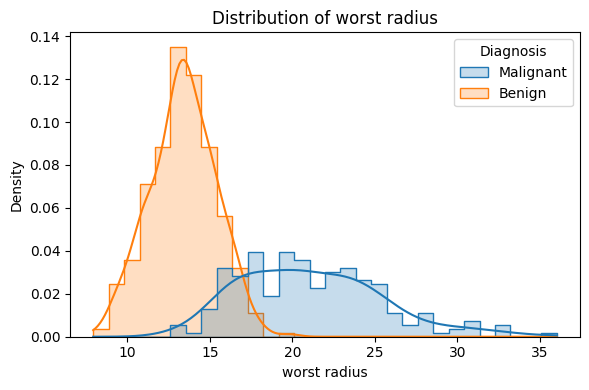

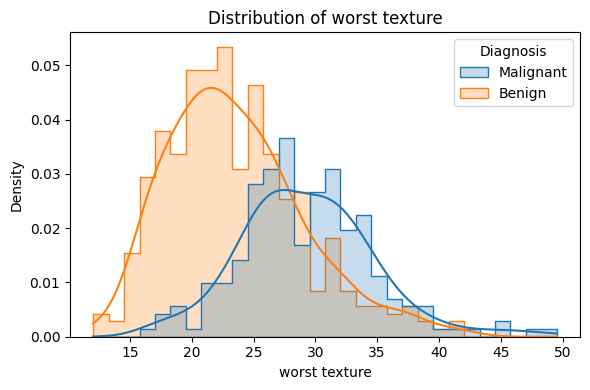

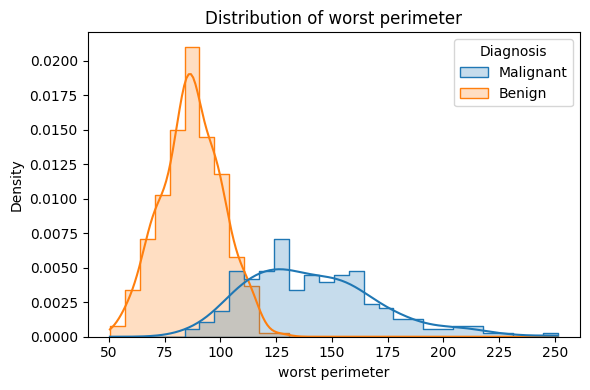

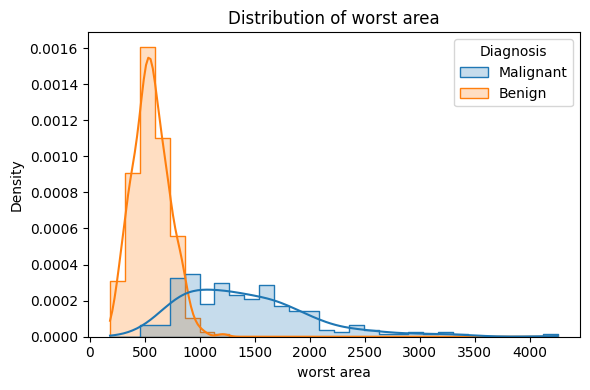

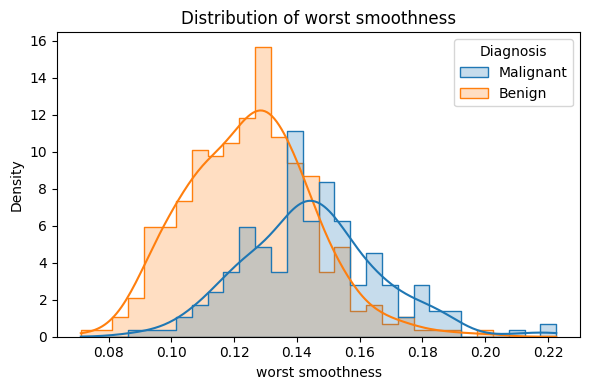

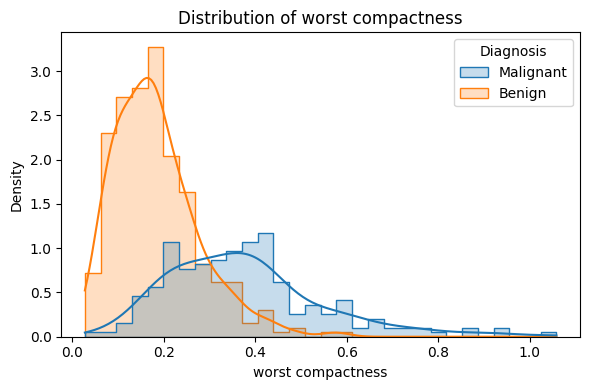

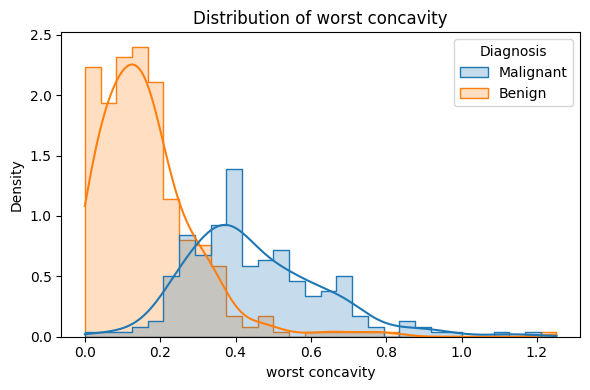

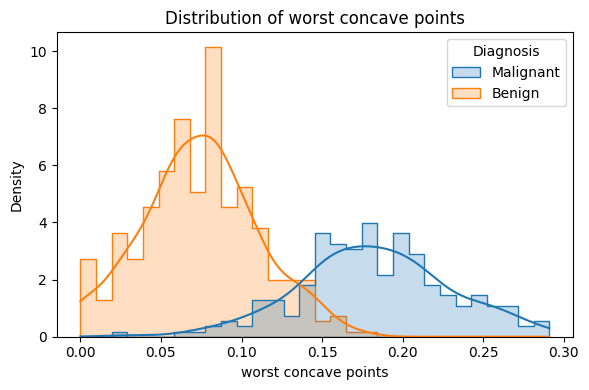

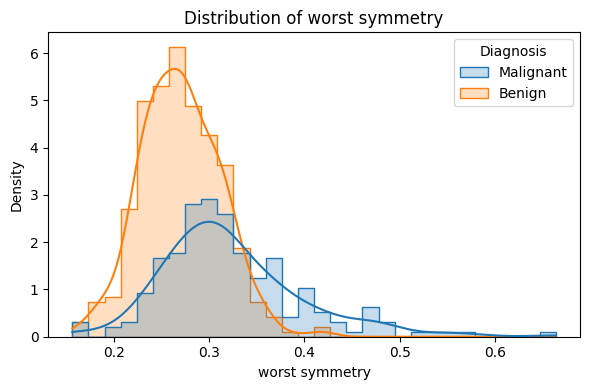

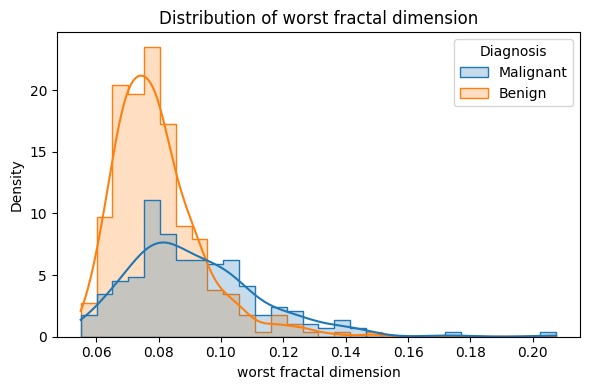

In [3]:
# --- Plot Histograms by Diagnosis ---
for feature in data.feature_names:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='Diagnosis', bins=30, kde=True, element='step', stat='density')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

** Remarks **

- As we can clearly see from the graphs, some attributes such as mean radius, perimeter, area, concavity, concave points(and their respective errors) are visually distinguishable for the Malignant and Benign cases, whereas other attributes like smoothness and texture were much less distinguishable, with the distributions largely overlapping.

- We will also create a correlation matrix heatmap of the variables to directly see how they each correlate with each other

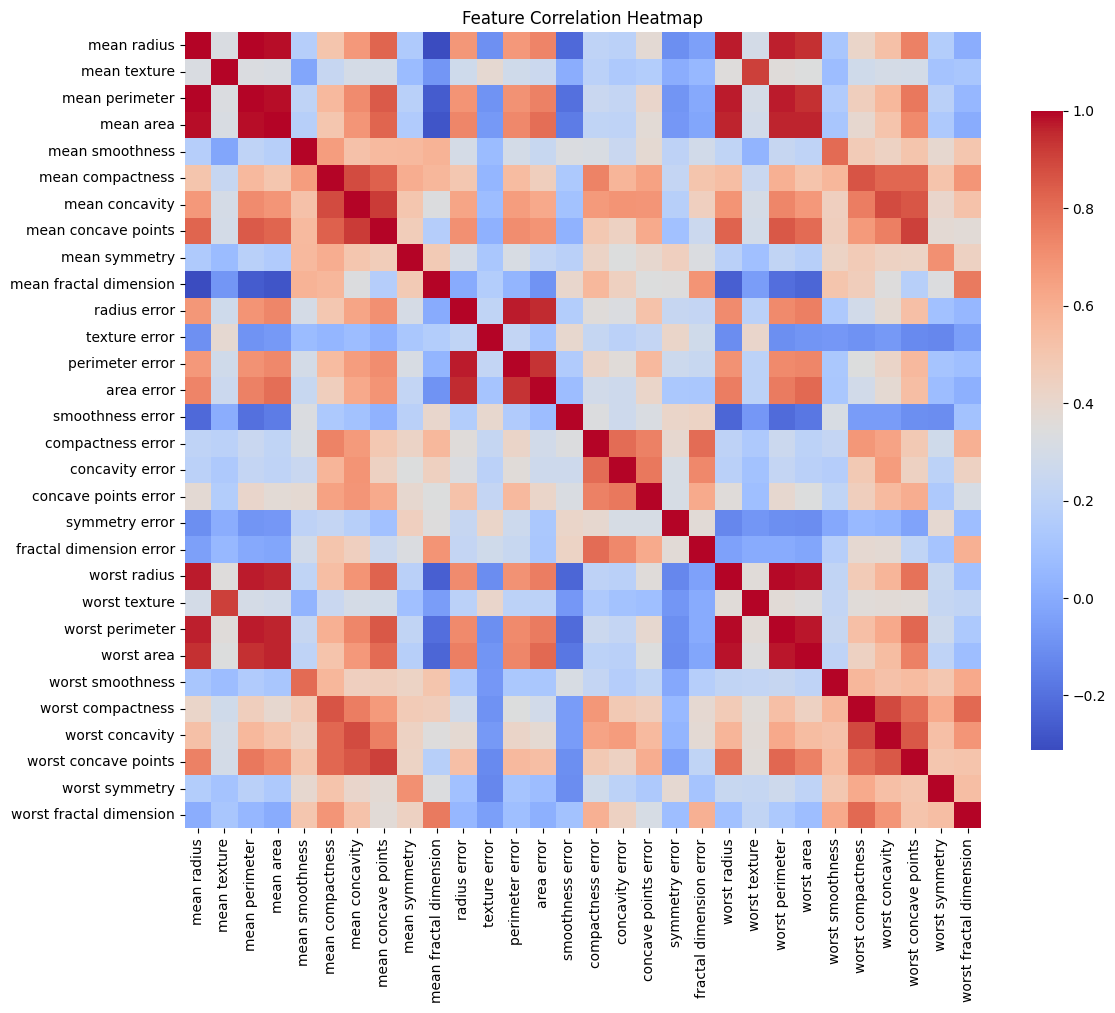

In [4]:
# --- Correlation Matrix Heatmap ---
plt.figure(figsize=(12, 10))
corr = df[data.feature_names].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

** Remarks **

- Not much to see here, everything was to be expected - the clusters of high correlations are variables naturally related to each other(such as measurement of radius, perimeter, area). But this was a good reminder that our final choice of variables should not be highly correlated with each other to avoid multicollinearity.

Based on what we have seen from the plots, we choose the following features to proceed:
- mean radius
- mean perimeter
- mean area
- mean concavity
- mean concave points

we will now create a pairplot for these variables as a visual check to see which would work well with a logistic regression model

# 2.2 - Visualization of chosen attributes
- We will visualize the attributes that seemed to be seperateble in relation to diagnosis, and chose our final choice based on our concern for seperability and multicolinearity.

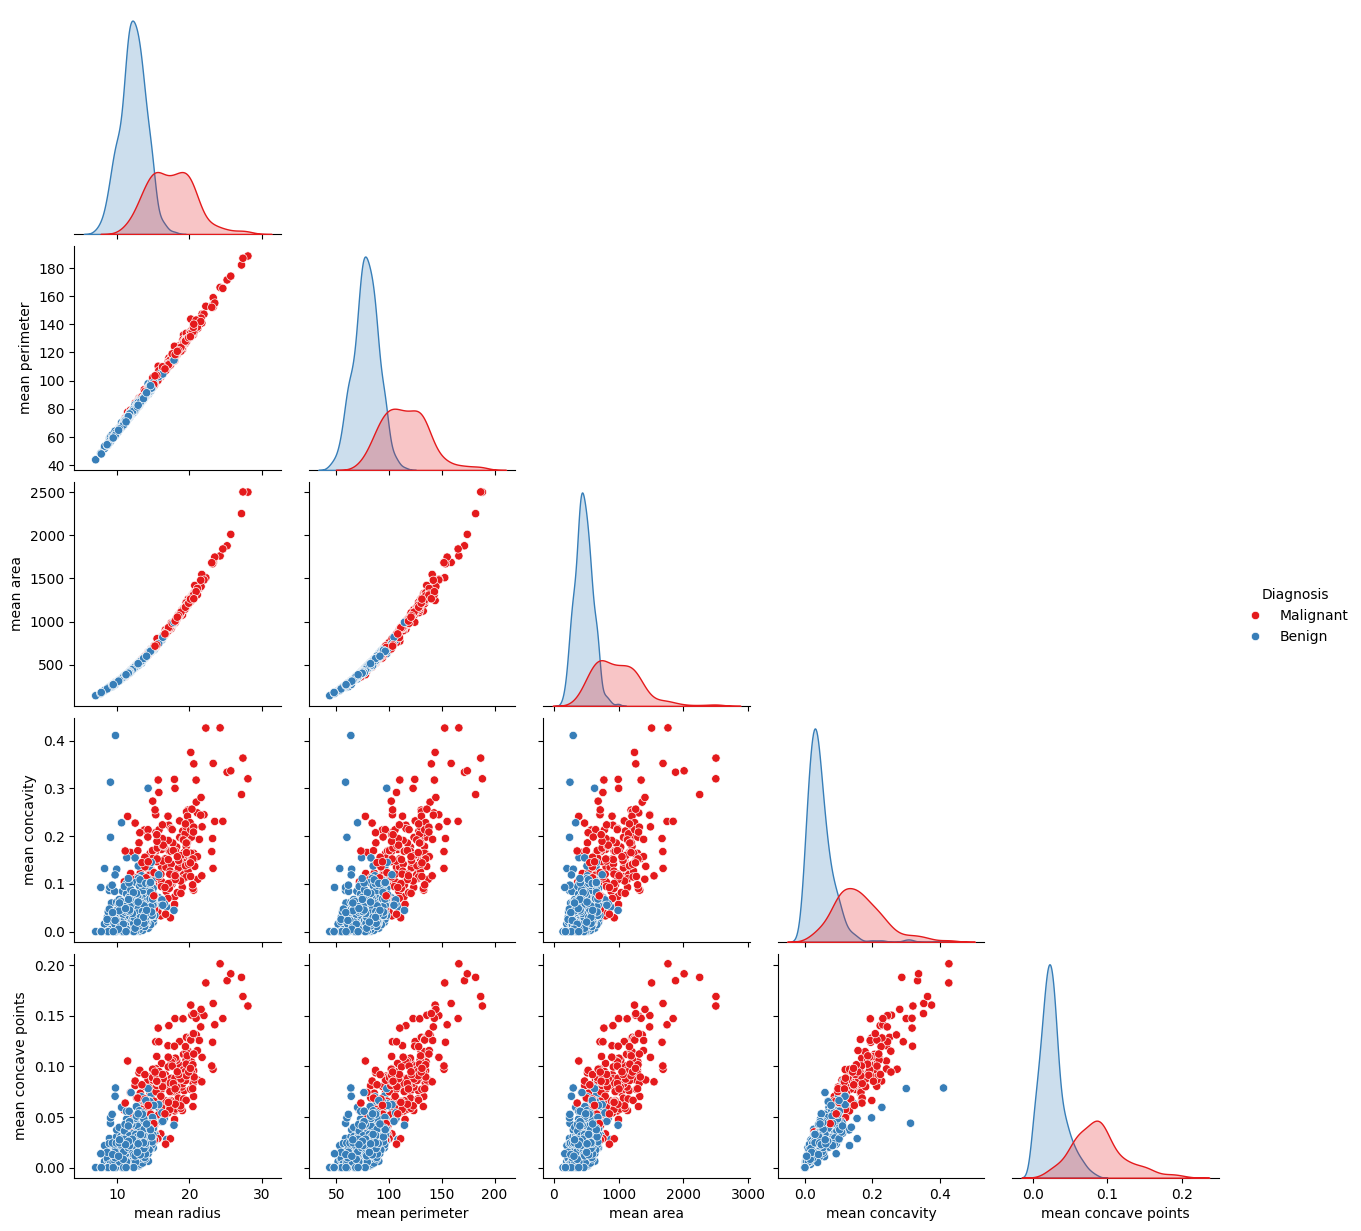

In [6]:
# --- Pairplot for Chosen Variables ---
top_features = ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points']

sns.pairplot(df[top_features + ['Diagnosis']], hue='Diagnosis', palette='Set1', corner=True)
plt.show()

** Remarks **

- as we suspected, the highly correlated like radius, perimeter, area are not randomly distributed and follow a clear relationship with each other. therefore we'd have to use another attribute to avoid multicolinearity.

- From the plots, we can see that mean concave points produced plots that looks pretty seperable with a logistic function. Concavity is another good choice, but there does seem to be more outliers in its plots that might mess up the model, especially given how suseptable logistic regression is to outliers. And since these two are obviously correlated with each other, we'll just go with the mean concave point

# 3 - Defining activiation & cross entropy loss function

- we will define a sigmoid activation function to be used in training our model.

- Once we have our feature vector and target vector, we can then pass these values into the SingleNeuron.train() method to train our logistic single neuron with stochastic gradient descent as implemented in the second binary_cross_entropy function

In [7]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss
def binary_cross_entropy(y_hat, y_true):
    # Clip y_hat to avoid log(0)
    y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)
    return -(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))

# 4 - Training logistic regression models

- here we will train our logistic regression model based on the chosen attribute mean concave points. 

In [8]:
# We'll use 'mean concave points'
X = df[['mean concave points']].values
df['target'] = data.target
y = df['target'].values

# Standardize feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Train the neuron
model = SingleNeuron(activation_function=sigmoid, cost_function=binary_cross_entropy)
model.train(X_train, y_train, alpha=0.01, epochs=100)

# 5 - plotting cost function over epochs
- we will now plot the cost over epochs to see if the model is learning and improving(ie. cost steadily decreasing)

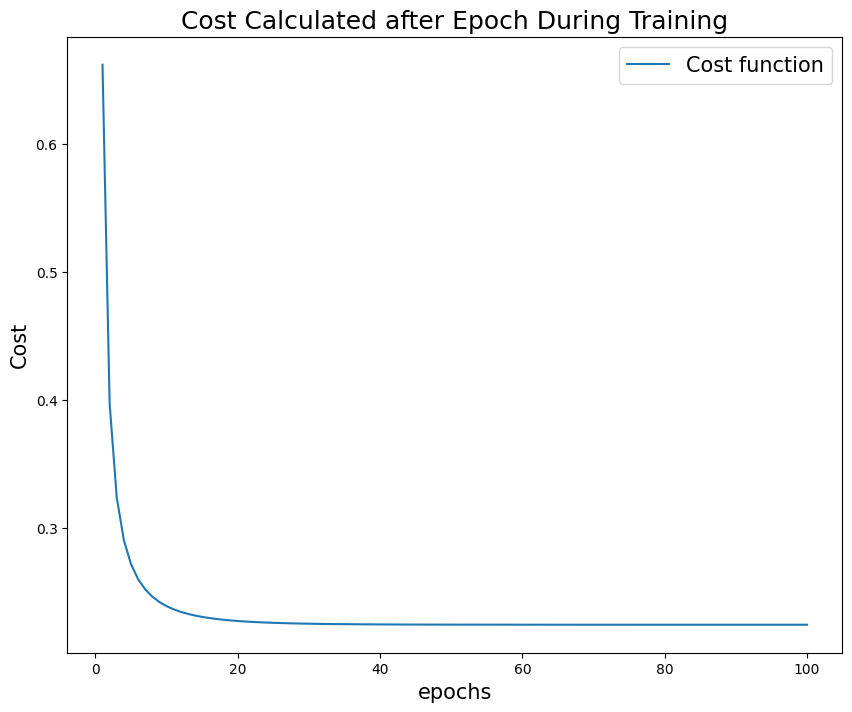

In [9]:
# Plot cost over time
model.plot_cost_function()

** Remarks **

- As we can see, the cost decreased steadily as epochs increased. Thus the model is definitely learning and approaching higher accuracy 

# 6 - Visualizing the logistic curve over raw data
- we will plot the logistic curve the model learned over the raw data, to visually check if the result makes sense

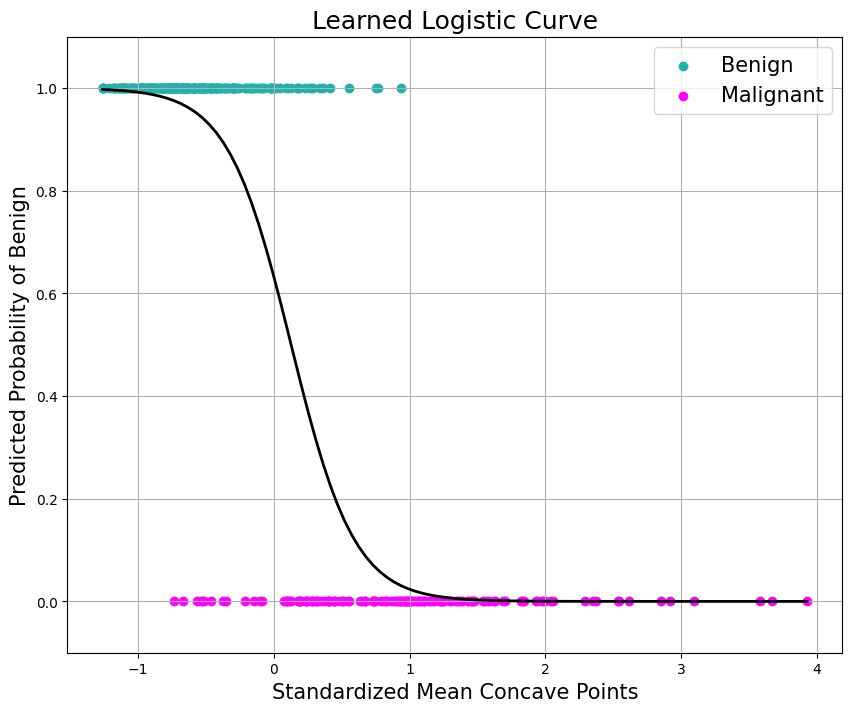

In [10]:
# Define the input domain in standardized units
domain = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
predicted_probs = model.predict(domain)

plt.figure(figsize=(10, 8))

# Scatter actual training data
plt.scatter(X_train[y_train == 1], np.ones_like(X_train[y_train == 1]), 
            color="lightseagreen", label="Benign")
plt.scatter(X_train[y_train == 0], np.zeros_like(X_train[y_train == 0]), 
            color="magenta", label="Malignant")

# Plot the learned logistic curve
plt.plot(domain, predicted_probs, color='black', linewidth=2)

plt.xlabel("Standardized Mean Concave Points", fontsize=15)
plt.ylabel("Predicted Probability of Benign", fontsize=15)  # <- fix
plt.title("Learned Logistic Curve", fontsize=18)
plt.ylim(-0.1, 1.1)
plt.legend(fontsize=15, loc="upper right")
plt.grid(True)
plt.show()


** Remarks **

- first note is that the logistic curve is flipped than in its usual form, but I looked through the program again and this was due to the  choice of mapping benign as 1 and malignant as 0. The clusters and predictions are still correct, we just need to specify that the model was trained to *identify benign* cases.

- looks like a pretty reasonable curve! We'll confirm this by directly calculating its performance metrices next to ensure it worked

# 7 - Calculating performance metrics and confusion matrix

- We will now calculate the precision, f1 scores for the model for the two diagnosis, from which we will try to judge how well it performed, and importantly, how did its performance differ for the two different diagnosis(especially important since we're dealing with cancer diagnosis)

- the confusion matrix will show us if there was a particular bias against a certain diagnosis

Model Accuracy: 0.8947
Model F1 Score: 0.9167

Classification Report:

               precision    recall  f1-score   support

Malignant (0)       0.86      0.86      0.86        63
   Benign (1)       0.92      0.92      0.92       108

     accuracy                           0.89       171
    macro avg       0.89      0.89      0.89       171
 weighted avg       0.89      0.89      0.89       171



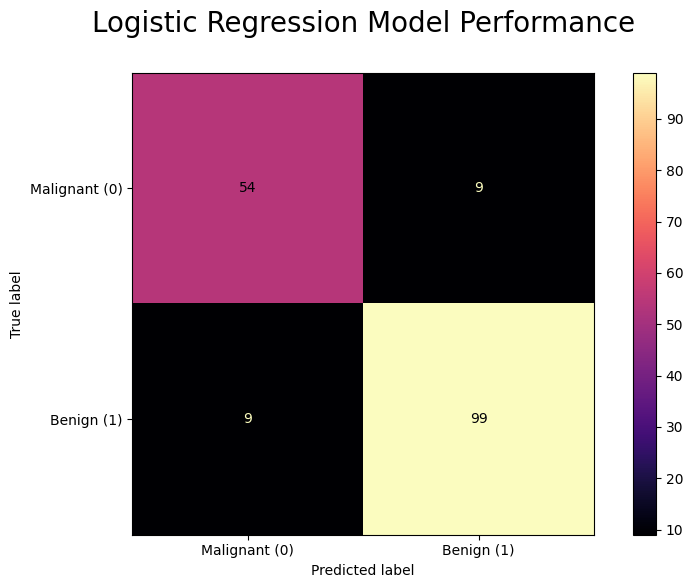

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Get model probabilities
y_hat_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_hat = (y_hat_prob >= 0.5).astype(int)

# Print accuracy and F1 score
print(f"Model Accuracy: {np.round(accuracy_score(y_test, y_hat), 4)}")
print(f"Model F1 Score: {np.round(f1_score(y_test, y_hat), 4)}")

# Define labels
displabels = ['Malignant (0)', 'Benign (1)']

# Confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_title('Logistic Regression Model Performance\n', fontsize=20)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels=displabels, cmap='magma', colorbar=True, ax=ax)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_hat, target_names=displabels))


** Remarks **

- Accuracy: 89.47%
our model correctly predicted the diagnosis for ~89% of the test samples, which is pretty high

- F1 Score: 91.67%
this balanced metric (harmonic mean of precision and recall) indicates the model performs particularly well in correctly identifying both classes, with a slight edge in identifying Benign tumors.

looking at the cross-wise performance and confusion matrix:
- Malignant (0): The model slightly underperforms on this class, which is clinically more critical. A recall of 0.86 means 14% of malignant cases were misclassified — potentially dangerous in a medical setting.

- Benign (1): The model handles benign cases better, which may reflect class imbalance or the simplicity of decision boundaries favoring this class.

- False classifications were relatively rare for both diagnosis, once again reflecting the 89% accuracy we saw before



# Conclusions:

- Bias Toward Benign: Higher performance on benign cases suggests the decision boundary might lean toward predicting "benign" unless the malignant signal is strong. But this is understandable as we see in early plots that the malignant cases don't differ significantly from benign untill higher values of mean concave point. 

- We also note that we're only using mean concave points, which might limits model expressiveness. A multivariate model may yield better predictions, especially for identifying dianosis in the overlapse zone

- But overall, the logistic model worked well in predicting diagnosis for a breast cancer case from mean concave points, though with room for improvements. 